# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [31]:
# Import numpy and pandas
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 

from pandas.plotting import lag_plot


from sklearn.linear_model import LinearRegression

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse



In [36]:
!pip3 install statsmodels

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [5]:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
dates = pd.date_range('1/1/2018 00:00:00','1/1/2018 00:29:10', periods=1751 )
freq = pd.infer_freq(dates)
print(freq)

S


In [7]:
dates.freq = freq
dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Assign the time series index to the dataframe's index.

In [8]:
# Your code here:
sensor.index = list(dates)
sensor[:3]


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

<ipython-input-9-5b1047a543d0>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(sensor['userAcceleration.x'], freq = 60)


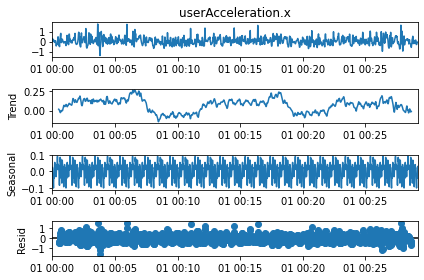

In [9]:
res = seasonal_decompose(sensor['userAcceleration.x'], freq = 60)
res.plot();


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

<ipython-input-10-37d8464a0569>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(sensor['rotationRate.x'], freq = 60)


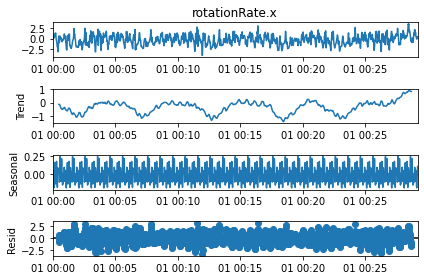

In [10]:
res = seasonal_decompose(sensor['rotationRate.x'], freq = 60)
res.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

In [11]:
y = sensor['userAcceleration.x']

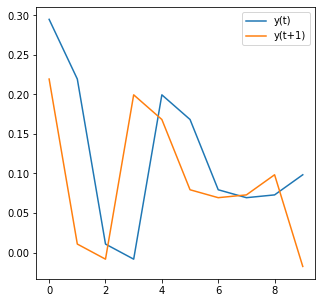

In [12]:
data_t = sensor['userAcceleration.x'][:-1]
data_t_plus_1 = sensor['userAcceleration.x'][1:]
plt.figure(figsize=(5,5))
plt.plot(data_t[:10].values, label="y(t)")
plt.plot(data_t_plus_1[:10].values, label="y(t+1)")
plt.legend();


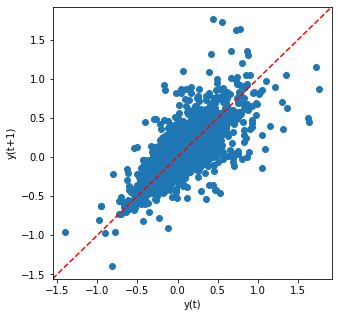

In [13]:
lag = 1
y_t = y[lag:]
y_plus = y[:-lag]
plt.figure(figsize=(5,5))
plt.scatter(y_t,y=y_plus)
plt.xlabel("y(t)")
plt.ylabel(f"y(t+{lag})")

plt.plot([0, 1], [0, 1], ls="--", c="r", transform=plt.gca().transAxes);

Create a lag plot for `rotationRate.x`

In [14]:

y = sensor['rotationRate.x']

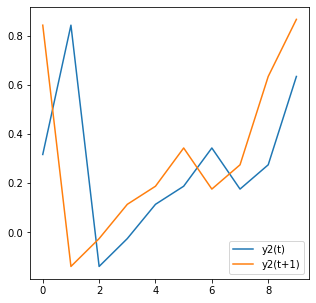

In [15]:
data_t = sensor['rotationRate.x'][:-1]
data_t_plus_1 = sensor['rotationRate.x'][1:]
plt.figure(figsize=(5,5))
plt.plot(data_t[:10].values, label="y2(t)")
plt.plot(data_t_plus_1[:10].values, label="y2(t+1)")
plt.legend();

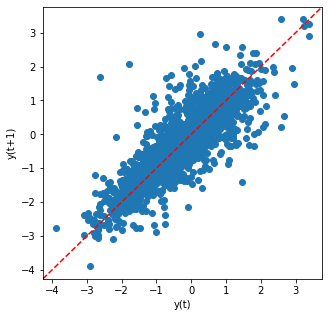

In [16]:
lag = 1
y_t = y[lag:]
y_plus = y[:-lag]
plt.figure(figsize=(5,5))
plt.scatter(y_t,y=y_plus)
plt.xlabel("y(t)")
plt.ylabel(f"y(t+{lag})")

plt.plot([0, 1], [0, 1], ls="--", c="r", transform=plt.gca().transAxes);

What are your conclusions from both visualizations?

- Autocorrelacion positiva con menos autocorrelacion en la primera 

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [17]:
adfuller(sensor['userAcceleration.x'])

(-17.957994086169762,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [18]:
adfuller(sensor['rotationRate.x'])

(-5.2698606250864355,
 6.320230335911768e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

Para ['userAcceleration.x']
- p-valor < 0,05 rechazamos Ho: la serie no es estacionaria, ror tanto es estacionaria 
- el valor de ADF es menor que cualquiera de los valores criticos, por tanto la serie es estacionaria

Para ['rotationRate.x']
- p-valor < 0,05 rechazamos Ho: la serie no es estacionaria, ror tanto es estacionaria 
- el valor de ADF es menor que cualquiera de los valores criticos, por tanto la serie es estacionaria


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [19]:
y_test = sensor['userAcceleration.x'][-10:]
y_train = sensor['userAcceleration.x'][:-10]

In [20]:
adfuller(y_train)

(-17.93534574610903,
 2.873412357668436e-30,
 4,
 1736,
 {'1%': -3.4341224629678426,
  '5%': -2.863206331927479,
  '10%': -2.5676571071932934},
 -715.8105939817506)

- p-valor < 0,05 rechazamos Ho: "la serie no es estacionaria", por tanto es estacionaria. 
- El valor de ADF es menor que cualquiera de los valores criticos, por tanto la serie es estacionaria

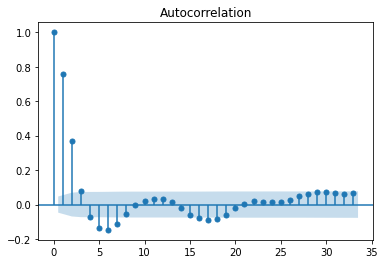

In [21]:
plot_acf(y_train);

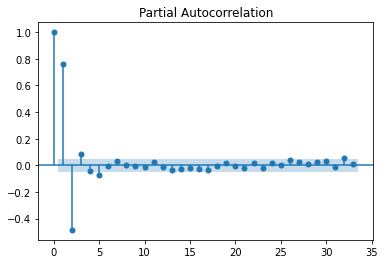

In [22]:
plot_pacf(y_train);

In [23]:
order = (2,0,1)
arima = ARIMA(y_train, order=order, freq="S")
arima;

/usr/local/Caskroom/miniconda/base/envs/ironhack=3.8/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


In [24]:
arima = arima.fit()

In [49]:
y_pred = arima.predict(len(y_train),len(y_train)+10)


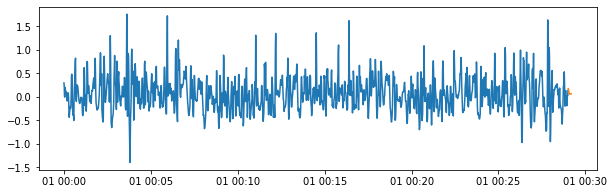

In [50]:
plt.figure(figsize=(10,3))
plt.plot(y_train)
plt.plot(y_pred)



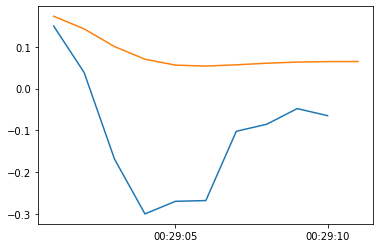

In [51]:
plt.plot(y_test)
plt.plot(y_pred)

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [67]:
# Your code here:

rmse(y_test,y_pred[:-10])



0.31624505977914896